In [803]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager
import re

In [804]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [805]:
# 모든 열을 표시
pd.set_option('display.max_columns', None)

# 모든 행을 표시
pd.set_option('display.max_rows', None)

# 열 너비 제한 해제
pd.set_option('display.width', None)

# 셀 내용 잘림 방지
pd.set_option('display.max_colwidth', None)

In [806]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [807]:
rdf_sp = df_sp.copy()

In [808]:
CH4 = (df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'])/const.N_A*16
C2H6 = (df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'])/const.N_A*30
C2H4 = (df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])/const.N_A*28
C2H2 = (df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'])/const.N_A*26
C3H8 = (df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])/const.N_A*44
C3H6 = (df_sp['C3H6'] + df_sp['C3H6(V)'])/const.N_A*42
C2H = df_sp['C2H']/const.N_A*25
CH = df_sp['CH']/const.N_A*13
C3H7 = df_sp['C3H7']/const.N_A*43
C3H5 = df_sp['C3H5']/const.N_A*41
CH3 = df_sp['CH3']/const.N_A*15
CH2 = df_sp['CH2']/const.N_A*14
C2H3 = df_sp['C2H3']/const.N_A*27
C4H9 = df_sp['C4H9']/const.N_A*57
C2H5 = df_sp['C2H5']/const.N_A*29
C3H4 = df_sp['C3H4']/const.N_A*40
C5H12 = df_sp['C5H12']/const.N_A*72
C4H10 = df_sp['C4H9H']/const.N_A*58

del_CH4 = CH4.iloc[0] - CH4.iloc[-1]
CH4_conv_cal = del_CH4/CH4.iloc[0] * 100
total_CH = C2H6 + C2H4 + C2H2 + C3H8 + C3H6 + C2H + CH + C3H7 + C3H5 + CH3 + CH2 + C2H3 + C4H9 + C2H5 + C3H4 + C5H12 + C4H10
C2H6_sel_cal = C2H6/total_CH * 100
C2H4_sel_cal = C2H4/total_CH * 100
C2H2_sel_cal = C2H2/total_CH * 100
C3H8_sel_cal = C3H8/total_CH * 100
C3H6_sel_cal = C3H6/total_CH * 100
C2H_sel_cal = C2H/total_CH * 100
CH_sel_cal = CH/total_CH * 100
C3H7_sel_cal = C3H7/total_CH * 100
C3H5_sel_cal = C3H5/total_CH * 100
CH3_sel_cal = CH3/total_CH * 100
CH2_sel_cal = CH2/total_CH * 100
C2H3_sel_cal = C2H3/total_CH * 100
C4H9_sel_cal = C4H9/total_CH * 100
C2H5_sel_cal = C2H5/total_CH * 100
C3H4_sel_cal = C3H4/total_CH * 100
C5H12_sel_cal = C5H12/total_CH * 100
C4H10_sel_cal = C4H10/total_CH * 100

In [809]:
len(df_sp['Time [s]'])

1513

10.647235772357714


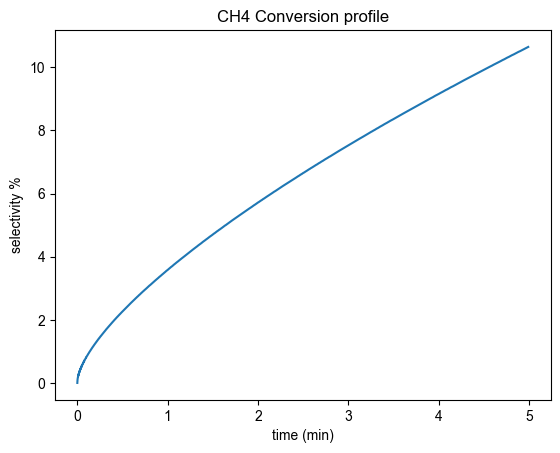

In [810]:
plt.plot(df_sp['Time [s]'], (CH4.iloc[0] - CH4)/CH4.iloc[0]*100)
plt.title('CH4 Conversion profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
print((CH4.iloc[0] - CH4.iloc[-1])/CH4.iloc[0]*100)

In [811]:

print(3/2*df_cd['Electron temperature [K]'].iloc[-1] / const.e * const.k)
print(df_cd['Current density [A/cm2]'].iloc[-1])

8.874345226688657
8.3152e-06


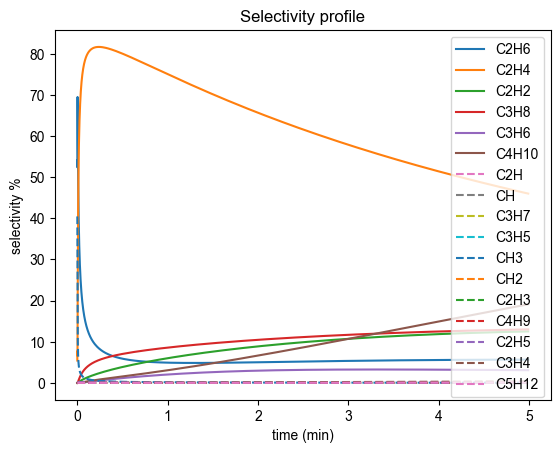

In [812]:
a = 200
plt.plot(df_sp['Time [s]'], C2H6_sel_cal, label='C2H6')
plt.plot(df_sp['Time [s]'], C2H4_sel_cal, label='C2H4')
plt.plot(df_sp['Time [s]'], C2H2_sel_cal, label='C2H2')
plt.plot(df_sp['Time [s]'], C3H8_sel_cal, label='C3H8')
plt.plot(df_sp['Time [s]'], C3H6_sel_cal, label='C3H6')
plt.plot(df_sp['Time [s]'], C4H10_sel_cal, label='C4H10')
plt.plot(df_sp['Time [s]'], C2H_sel_cal, label='C2H',linestyle='--')
plt.plot(df_sp['Time [s]'], CH_sel_cal, label='CH',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H7_sel_cal, label='C3H7',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H5_sel_cal, label='C3H5',linestyle='--')
plt.plot(df_sp['Time [s]'], CH3_sel_cal, label='CH3',linestyle='--')
plt.plot(df_sp['Time [s]'], CH2_sel_cal, label='CH2',linestyle='--')
plt.plot(df_sp['Time [s]'], C2H3_sel_cal, label='C2H3',linestyle='--')
plt.plot(df_sp['Time [s]'], C4H9_sel_cal, label='C4H9',linestyle='--')
plt.plot(df_sp['Time [s]'], C2H5_sel_cal, label='C2H5',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H4_sel_cal, label='C3H4',linestyle='--')
plt.plot(df_sp['Time [s]'], C5H12_sel_cal, label='C5H12',linestyle='--')
plt.title('Selectivity profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
plt.legend()
plt.show()

In [813]:
a = df_rx.columns[(df_rx > 1e14).any()].tolist()
b = [col for col in a if not re.search(r'bolsig|e|\^+', col)]
c = [col for col in b if re.search(r'C4H9H', col)]
print(C2H6_sel_cal.iloc[-1])
print(C2H4_sel_cal.iloc[-1])
print(C2H2_sel_cal.iloc[-1])
print(C3H6_sel_cal.iloc[-1])
print(C3H8_sel_cal.iloc[-1])

5.662698448204511
46.019322593868885
12.510430215604416
3.0937743846997114
13.007402710296601


In [814]:
df1 = df_rx[a].sort_values(by=df_rx[a].index[-1], axis=1, ascending=False).columns.tolist()
df2 = df_rx[a].sort_values(by=df_rx[a].index[-1], axis=1, ascending=False).iloc[-1].tolist()

df_rx_screen = pd.DataFrame({
    'RXN': df1,
    'rate': df2
})
print(df_rx_screen)

                            RXN          rate
0           bolsig:C2H6->C2H4H2  1.510100e+18
1             2 C2H4+H2=>C2H5+H  1.389300e+18
2                1 C2H4+H=>C2H5  1.171100e+18
3        4 C2H5+C2H5=>C2H6+C2H4  1.056200e+18
4                5 C2H5+H=>C2H6  2.589700e+17
5          bolsig:CH4->CH4(V24)  1.451300e+17
6          bolsig:CH4->CH4(V13)  1.317800e+17
7               4 CH4+CH2=>C2H6  1.209100e+17
8              bolsig:CH4->CH3H  1.069800e+17
9            2 E+E+CH2^+=>E+CH2  1.043400e+17
10          bolsig:CH4->H2CH2^+  9.726100e+16
11           0 E+E+CH4^+=>E+CH4  7.938700e+16
12               9 C3H6+H=>C3H7  7.635000e+16
13              7 CH3+CH3=>C2H6  7.551200e+16
14            bolsig:CH4->CH4^+  7.341800e+16
15            3 C2H5+H=>CH3+CH3  7.271500e+16
16             0 CH3+C2H5=>C3H8  6.454300e+16
17               5 C2H2+H=>C2H3  5.110200e+16
18           1 E+E+CH3^+=>E+CH3  4.557900e+16
19          bolsig:C3H8->C3H6H2  4.450300e+16
20           7 C2H5+C2H5=>C4H9H  4

In [815]:
df1

[' bolsig:C2H6->C2H4H2',
 '2 C2H4+H2=>C2H5+H',
 '1 C2H4+H=>C2H5',
 '4 C2H5+C2H5=>C2H6+C2H4',
 '5 C2H5+H=>C2H6',
 'bolsig:CH4->CH4(V24)',
 'bolsig:CH4->CH4(V13)',
 '4 CH4+CH2=>C2H6',
 ' bolsig:CH4->CH3H',
 '2 E+E+CH2^+=>E+CH2',
 ' bolsig:CH4->H2CH2^+',
 '0 E+E+CH4^+=>E+CH4',
 '9 C3H6+H=>C3H7',
 '7 CH3+CH3=>C2H6',
 ' bolsig:CH4->CH4^+',
 '3 C2H5+H=>CH3+CH3',
 '0 CH3+C2H5=>C3H8',
 '5 C2H2+H=>C2H3',
 '1 E+E+CH3^+=>E+CH3',
 ' bolsig:C3H8->C3H6H2',
 '7 C2H5+C2H5=>C4H9H',
 ' bolsig:CH4->HCH3^+',
 '2 CH3+C2H3=>C2H2+CH4',
 '1 CH3+C3H7=>C2H5+C2H5',
 ' bolsig:C2H4->C2H2H2',
 '6 CH3+C3H7=>C3H6+CH4',
 '8 bolsig:H2->HH',
 '9 C2H5+C2H3=>C2H4+C2H4',
 ' bolsig:CH4->CH2H2',
 ' bolsig:C2H4->C2H2HH',
 '0 C2H5+C3H7=>C3H6+C2H6',
 '9 C2H5+C3H7=>C3H8+C2H4',
 '9 bolsig:CH4(V24)->CH3H',
 '0 bolsig:CH4(V13)->CH3H',
 'bolsig:C2H4->C2H4(V1)',
 '9 bolsig:CH4(V24)->H2CH2^+',
 ' bolsig:C3H8->C2H4CH4',
 '6 E+E+C2H4^+=>E+C2H4',
 '0 bolsig:CH4(V13)->H2CH2^+',
 '4 C2H5+H=>C2H4+H2',
 '5 bolsig:CH4(V24)->CH4^+',
 '5 CH4+CH